## Traning a CNN for a real-world Image Classification Task

In [1]:
## With Tensorflow 

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
cifar_x_train = cifar_x_train.astype('float32') / 255.0
cifar_x_test = cifar_x_test.astype('float32') / 255.0

In [4]:
## Data Augmentation 

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [5]:
batch_size = 64
train_ds = tf.data.Dataset.from_tensor_slices((cifar_x_train, cifar_y_train))
train_ds = train_ds.shuffle(50000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [6]:
model_cifar = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\patel\.conda\envs\Vision_Ann\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
with tf.device('/GPU:0'):
    model_cifar.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history_cifar = model_cifar.fit(
        train_ds,
        epochs=30,
        validation_data=(cifar_x_test, cifar_y_test),
        callbacks=[early_stop]
    )

Epoch 1/30


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5092 - loss: 1.3747 - val_accuracy: 0.5689 - val_loss: 1.2204
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5558 - loss: 1.2534 - val_accuracy: 0.6104 - val_loss: 1.1046
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5815 - loss: 1.1932 - val_accuracy: 0.6241 - val_loss: 1.0655
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6019 - loss: 1.1355 - val_accuracy: 0.6272 - val_loss: 1.0585
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6190 - loss: 1.0795 - val_accuracy: 0.6493 - val_loss: 1.0139
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6339 - loss: 1.0535 - val_accuracy: 0.6442 - val_loss: 1.0233
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6412 - loss: 1.0276 - val_accuracy: 0.6620 - val_loss: 0.9874
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6545 - loss: 0.9899 - val_accuracy: 0.6575

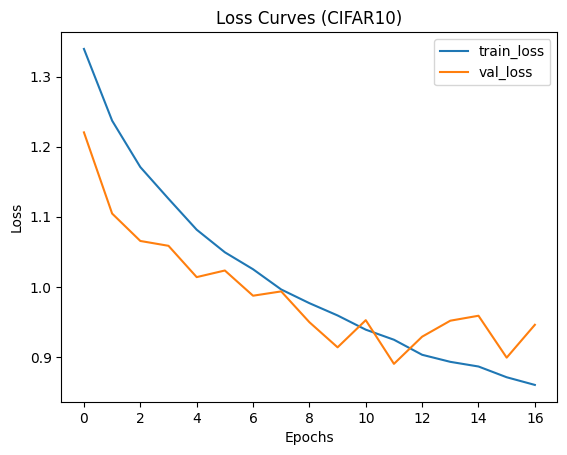

In [9]:
## Visualization

plt.plot(history_cifar.history['loss'], label='train_loss')
plt.plot(history_cifar.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves (CIFAR10)')
plt.legend()
plt.show()


In [17]:
## Using Pytorch
## Data set CIFAR 10

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn 
import torch.optim as optim


In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [19]:
transform_cifar = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
    ])

In [20]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_cifar
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_cifar
)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

Epoch 1/10 - Loss: 1.5005 - Test Accuracy: 53.00%
Epoch 2/10 - Loss: 1.1601 - Test Accuracy: 62.22%
Epoch 3/10 - Loss: 1.0335 - Test Accuracy: 63.53%
Epoch 4/10 - Loss: 0.9505 - Test Accuracy: 66.74%
Epoch 5/10 - Loss: 0.8916 - Test Accuracy: 68.04%
Epoch 6/10 - Loss: 0.8442 - Test Accuracy: 69.53%
Epoch 7/10 - Loss: 0.8024 - Test Accuracy: 69.35%
Epoch 8/10 - Loss: 0.7652 - Test Accuracy: 70.51%
Epoch 9/10 - Loss: 0.7344 - Test Accuracy: 70.61%
Epoch 10/10 - Loss: 0.7067 - Test Accuracy: 71.26%


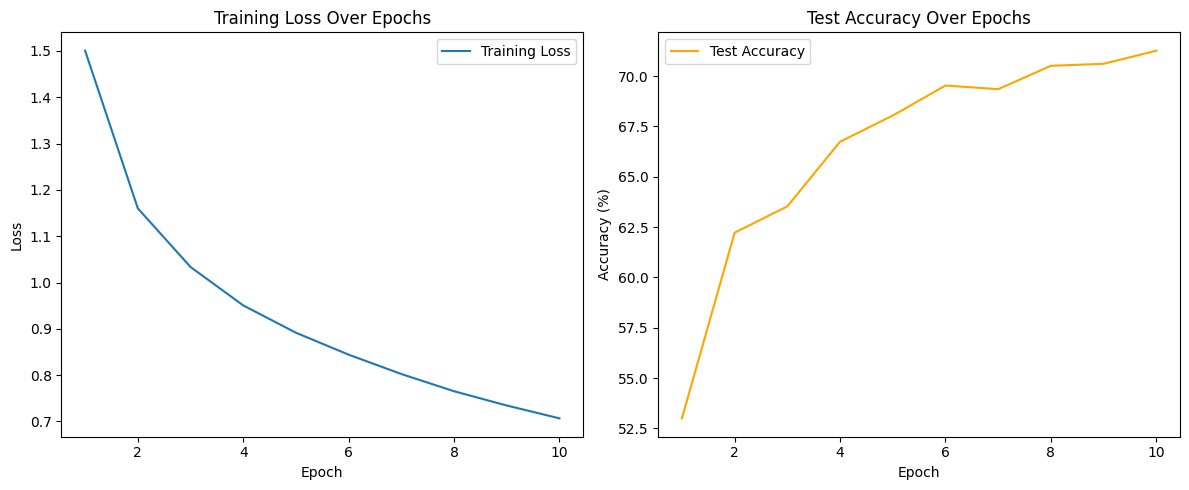

In [ ]:
## CNN Network

class SimpleCNN3Ch(nn.Module):
    def __init__(self):
        super(SimpleCNN3Ch, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2)
        # For CIFAR-10 (32x32), after 2 pooling layers: 32/2/2 = 8
        self.fc1 = nn.Linear(64*8*8, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model_cifar = SimpleCNN3Ch().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cifar.parameters(), lr=1e-3)


train_losses = []
test_accuracies = []

epochs = 10
for epoch in range(epochs):
    model_cifar.train()
    running_loss = 0.0
    
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_cifar(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    
   
    model_cifar.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_cifar(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    
    accuracy = 100.0 * correct / total
    test_accuracies.append(accuracy)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f} - Test Accuracy: {accuracy:.2f}%")


plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


